# 8. alkalom: Modulok és csomagok. Ismerkedés a numpy és a matplotlib csomag lehetőségeivel

## Modulok és Csomagok néhány példával
**Modul**: Python nyelvű fájl. [Modulok a dokumentációban](https://docs.python.org/3/tutorial/modules.html)
- Definíciókat és utasításokat tartalmaz.
- Ha a modulhoz az `xyz.py` fájl tartozik, akkor a modulra `xyz` néven lehet hivatkozni.
- A modulok más Python programokból importálhatók.

**Csomag**: Modulok gyűjteménye.  [Csomagok a dokumentációban](https://docs.python.org/3/tutorial/modules.html#packages)
- Egy csomag alcsomagokat/almodulokat is tartalmazhat. A hierarchiát a csomagon belüli könyvtárszerkezet határozza meg.
- A standard csomagok és modulok a standard könyvtárban találhatók, és nem igényelnek telepítést.
- A külső csomagok gyűjtőhelye a PyPI (https://pypi.python.org/pypi).

### Modul vagy csomag importálása, majd abból a szükséges függvény meghívása

In [1]:
## Modul/csomag importálása.
import random

In [2]:
# A random egészet sorsoló függvény meghívása 
random.randint(1, 100)

94

In [3]:
# de egy listából is vehetünk ki véletlenszerűen elemet
l = ["alma", "körte","szilva","málna"]
random.choice(l)

'alma'

### Csak a szükséges függvények importálása egy modulból/csomagból.

In [4]:
## Egyetlen függvény importálása egy modulból/csomagból.
from random import randint

In [5]:
# használjuk az importált függvényt!
randint(10, 20)

15

In [6]:
## Függvény(ek) importálása almodulból/alcsomagból.
from os.path import dirname, split

In [7]:
# nézzünk utána a függvényeknek és használjuk őket
dirname('/tmp/pistike/a.txt')
split('/tmp/pistike/a.txt')

('/tmp/pistike', 'a.txt')

### Modul/csomag teljes tartalmának importálása 
**Megjegyzés:** Ez a megoldás általában kerülendő. Keveredhetnek a függvény nevek. 

In [8]:
# from random import *

### Modul vagy csomag importálása rövid néven

Tipikus rövid nevek:
- random - rd
- math - m
- numpy - np
- pandas - pd


In [9]:
## rövidítve könnyebb rá hívatkozni (vannak tipikus rövidítések!) 
import random as rd

In [10]:
# A random egészet sorsoló függvény meghívása 
rd.randint(0,10)

3

## Megjegyzés: listák másolásáról
 - [Másolás - copy csomag a dokumentációban ](https://docs.python.org/3/library/copy.html)
- Sekély (shallow) és mély (deep) másoló függvényt tartalmaz.

b = a értékadás számokkal

In [11]:
## Valódi érték másolás történik
a = 2
b = a
print("a = ", a, ";\tb = ", b)
a = 3
print("a = ", a, ";\tb = ", b)

a =  2 ;	b =  2
a =  3 ;	b =  2


b = a értékadás listákkal 
- NEM végez másolást
- csak hívatkozást hoz létre

In [12]:
# Csak memória helyre való hívatkozás másolás történik
a = [1, 2, 3]
b = a
print("a = ", a, ";\tb = ", b)
b[0] = 2
print("a = ", a, ";\tb = ", b)

a =  [1, 2, 3] ;	b =  [1, 2, 3]
a =  [2, 2, 3] ;	b =  [2, 2, 3]


Ha független másolatot szeretnénk ahhoz kell a copy csomag

In [13]:
import copy as cp

In [14]:
## síma lista
a = [1, 2, 3]

In [15]:
# Sekély másolat készítése.
b = cp.copy(a)
print("a = ", a, ";\tb = ", b)
b[0] = 2
a[-1] =10
print("a = ", a, ";\tb = ", b)

a =  [1, 2, 3] ;	b =  [1, 2, 3]
a =  [1, 2, 10] ;	b =  [2, 2, 3]


In [16]:
## listák listája
a = [[1], [2], [2]]

In [17]:
# Sekély másolat készítése egy listák listája objektumról.
b = cp.copy(a)
print("a = ", a, ";\tb = ", b)

a =  [[1], [2], [2]] ;	b =  [[1], [2], [2]]


In [18]:
# A cp.copy() csak az adatszerkezet legfelső szintjén végez másolást.
b[0][0] = 10
print("a = ", a, ";\tb = ", b)

a =  [[10], [2], [2]] ;	b =  [[10], [2], [2]]


In [19]:
# Mély másolat készítése egy listák listája objektumról.
a = [[1], [2], [3]]
b = cp.deepcopy(a)
b[0][0] = 10
print("a = ", a, ";\tb = ", b)

a =  [[1], [2], [3]] ;	b =  [[10], [2], [3]]


## NumPy csomag

A [NumPy](http://www.numpy.org/) egy alacsony szintű matematikai csomag, numerikus számításokhoz.

- Alapvető adatszerkezete az [n dimenziós tömb](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).  Így praktikus vektorokkal való számolásoknál. 
- C nyelven íródott. A szokásos tömbműveletek hatékonyan vannak benne megvalósítva.
- Többek között tartalmaz lineáris algebrai és véletlenszám generáló almodult.
- Számos magasabb szintű csomag (pl. scipy, matplotlib, pandas, scikit-learn) épül rá.

A NumPy külső csomag. A Colab felületén ez is elérhető. 

De a saját gépünkön szükség van telepítésére. Többféle lehetőség van, például:
- `pip install numpy --user`
- `sudo apt-get install python3-numpy`
- `conda install numpy`

In [ ]:
## A NumPy modul importálása np néven.
import numpy as np

In [21]:
# Verzió lekérdezése.
np.__version__

'1.23.4'

### Állandók és függvények (mint a math csomagban)

In [22]:
## Megvan a pi és az e állandó sok tizedes jegyre:  
np.pi, np.e

(3.141592653589793, 2.718281828459045)

In [23]:
## cos(x) sin(x) trigonometrikus függvények
np.cos(np.pi/4)

0.7071067811865476

In [24]:
## sqrt(x) gyökvonás    
np.sqrt(3)

1.7320508075688772

In [25]:
## Van beépített függvény legnagyobb közös osztóra
# greatest common divisor --> gcd() 

np.gcd(60,18)

6

### Tömbök létrehozása

#### Példa: egész számokból álló tömb létrehozása

In [26]:
# egész számokból álló 1 x 3 méretű tömb - SORVEKTOR
a = np.array([2, 3, 4])

In [27]:
print(a)

[2 3 4]


In [28]:
# A tömb objektum típusa.
type(a)

numpy.ndarray

In [29]:
# a tömb elemei módosíthatóak
a[2] = 5
print(a)

[2 3 5]


#### Tömb jellemzők lekérdezése
dimenzió (ndim), méret (shape), összes elem (size), adattípus (dtype)

In [30]:
# Hány dimenziós a tömb?
a.ndim

1

In [31]:
# A tömb alakja/mérete.
a.shape

(3,)

In [32]:
len(a)

3

In [33]:
# összes elem 
a.size

3

In [34]:
# Az elemek típusának lekérdezése.
# A NumPy tömbök homogének, azaz egyféle adatok vannak benne
a.dtype

dtype('int64')

**Feladat**: Hozzunk létre egy 2 x 3-as tömböt, valós számokkal

Kérdezzük le a dimenziók számát, a tömb méretét, az elemek számát, az elemek típusát!


In [35]:
# Hozzunk létre egy 2 x 3-as tömböt, valós számokkal
b = np.array( [ [ 0.1, 0.2  , 4.5 ],
                [4.44, 5.12 , np.pi]  ]  )

In [36]:
print(b)

[[0.1        0.2        4.5       ]
 [4.44       5.12       3.14159265]]


In [37]:
# Dimenziók száma, mérete, az elemek típusa.
b.ndim, b.size, b.shape, len(b), b.dtype

(2, 6, (2, 3), 2, dtype('float64'))

#### További módszerek tömb létrehozásra
`genfromtxt()`; `zeros()`; `ones()`; `arange()`; `concatenate()`

In [38]:
## készítsünk  egy "matrix.txt" nevű fájlt 
## 2 sorban 3 egész szám szóközzel elválasztva

In [39]:
## Innen le is tölthetünk egyet (Colabban / Linuxos gépen működik)
!wget https://raw.githubusercontent.com/zoldbirka/colab-test-pub/master/_files/matrix.txt

--2024-11-27 14:40:38--  https://raw.githubusercontent.com/zoldbirka/colab-test-pub/master/_files/matrix.txt
raw.githubusercontent.com (raw.githubusercontent.com) feloldása… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Csatlakozás a következőhöz: raw.githubusercontent.com (raw.githubusercontent.com)[185.199.110.133]:443… kapcsolódva.
HTTP kérés elküldve, várakozás válaszra… 200 OK
Hossz: 210 [text/plain]
Mentés ide: „matrix.txt.1”

matrix.txt.1        100%[===================>]     210  --.-KB/s    idő 0s     

2024-11-27 14:40:47 (2,04 MB/s) -- „matrix.txt.1” mentve [210/210]



In [40]:
# majd olvassuk be a txt fájlt tömbként
np.genfromtxt('matrix.txt')

array([[0., 1., 1., 0., 1., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 1.]])

In [41]:
# Nullákból álló tömb létrehozása 1dimenziós
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [42]:
# Nullákból álló tömb létrehozása többdimenziós
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
# Egyesekből álló tömb létrehozása
np.ones((5, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [44]:
# Értéktartomány létrehozása a lépésköz megadásával.
np.arange(-5, 5, 0.5)

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [45]:
# Vektorok összefűzése.
a = np.array([2, 3])
b = np.array([44, 55, 66])
np.concatenate([a, b])

array([ 2,  3, 44, 55, 66])

### Másolás beépítve

In [46]:
## példa tömb
a = np.array([1, 2, 3])

In [47]:
## valódi másolat készítése, majd módosítása

b = a.copy()
print("a = ", a, ";\tb = ", b)
b [0] = 10
print("a = ", a, ";\tb = ", b)

a =  [1 2 3] ;	b =  [1 2 3]
a =  [1 2 3] ;	b =  [10  2  3]


### Elemek és résztömbök

In [48]:
## Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [49]:
# Elem kiválasztása (az indexelés 0-tól indul).
print("2. sor 3. eleme: ", a[1, 2])    # 1 a sorindex, 2 az oszlopindex
print("1. sor 2. eleme: ", a[0, 1])    # 0 a sorindex, 1 az oszlopindex

2. sor 3. eleme:  8
1. sor 2. eleme:  4


In [50]:
# Teljes sor kiválasztása.
a[1, : ]

array([6, 7, 8])

In [51]:
# A lista elemekre vonatkozó jelölés is jó.
a[1]

array([6, 7, 8])

In [52]:
# Oszlop kiválasztása.
a[: , 1]

array([4, 7])

In [53]:
# Adott indexű oszlopok kiválasztása.
a[: , [0, 2]]

array([[3, 5],
       [6, 8]])

In [54]:
# Oszlop kiválasztása és módosítása.
a[:, -1] = 4, 2
a

array([[3, 4, 4],
       [6, 7, 2]])

### Elemek kiválasztása logikai feltétel alapján.

In [55]:
## Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [56]:
# páros elemek kiválasztása
a[a % 2 == 0]     

array([4, 6, 8])

In [57]:
# 5 nél nagyobb elemek kiválasztása
a[a > 5]

array([6, 7, 8])

### Vektor műveletek (Tömbműveletek) Koordinátánként

In [58]:
## Hozzunk létre 2 példatömböt!
a = np.array([1, 7 ,3])
b = np.array([1, 1, 2])

In [59]:
# Elemenkénti összeadás.
a + b

array([2, 8, 5])

In [60]:
# Elemenkénti kivonás.
a - b

array([0, 6, 1])

In [61]:
# számmal szorzás 
2 * a

array([ 2, 14,  6])

In [62]:
# Elemenkénti hatványozás.
a**2

array([ 1, 49,  9])

In [63]:
# Elemenkénti szorzás.
print(a,b)
a*b

[1 7 3] [1 1 2]


array([1, 7, 6])

In [64]:
# Két vektor skaláris szorzata.
a = np.array([1, 7 ,3])
b = np.array([1, 1, 2])
a @ b

14

In [65]:
## A művelet nem feltétlenül végezhető el.
c = np.array([2, 3, 4]) # 3 hosszú tömb
d = np.array([10, 20])  # 2 hosszú tömb
c + d

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

### Függvények és tömbök

In [66]:
## Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [67]:
# Elemenkénti függvények (exp, log, sin, cos, ...).
np.cos(a) # koszinusz

array([[-0.9899925 , -0.65364362,  0.28366219],
       [ 0.96017029,  0.75390225, -0.14550003]])

In [68]:
np.log(a) # természetes alapú logaritmus

array([[1.09861229, 1.38629436, 1.60943791],
       [1.79175947, 1.94591015, 2.07944154]])

In [69]:
# álltalunk megadott függvény is alkalmazható array-re:
def f(x):
    return (x-2)**2
print(f(0.5))
print(f(a))

2.25
[[ 1  4  9]
 [16 25 36]]


### Kiegészítée: Statisztikai műveletek (min, max, sum, mean, std).


In [70]:
## Hozzunk létre egy példamátrixot!
a = np.array([[3, 4, 5],
              [6, 7, 8]])

In [71]:
## a tömb elemek összege
a.sum()

33

In [72]:
## minimum és maximum érték a tömbben:
a.min(), a.max()

(3, 8)

In [73]:
## minimum és maximum hely (argmin,argmax)
a.argmin(), a.argmax()

(0, 5)

In [74]:
## tömb elemek átlaga és szórása
a.mean(), a.std()

(5.5, 1.707825127659933)

### Keresés - np.where()

In [75]:
## Példa: Mely indexeknél találhatók az 5-nél kisebb elemek?
a = np.array([3, 10, 11, 4, 7, 8])


In [76]:
# elemek kiíratása és elemek indexének megkeresése
print(a[a < 5])
np.where(a < 5)

[3 4]


(array([0, 3]),)

### Rendezés

In [77]:
## egy példa tömb:
a = np.array([3, 10, 11, 4, 7, 8])
print(a)

[ 3 10 11  4  7  8]


In [78]:
# Rendezés helyben.
a.sort()
print(a)

[ 3  4  7  8 10 11]


In [79]:
## egy példa tömb:
a = np.array([3, 10, 11, 4, 7, 8])
print(a)

[ 3 10 11  4  7  8]


In [80]:
# Rendezés új tömbbe.
a = np.array([3, 10, 11, 4, 7, 8])
np.sort(a)

array([ 3,  4,  7,  8, 10, 11])

In [81]:
# Rendezés csökkenő sorrendbe.
np.sort(a, )[::-1]

array([11, 10,  8,  7,  4,  3])

## [Matplotlib](https://matplotlib.org/)

A Matplotlib adatok ábrázolásához hasznos csomag.

- Nyomdai minőségben testreszabható grafikon rajzolás
- Sokféle képfájlként kimenthető eredmény
- De animációt is lehet vele készíteni

A Matplotlib is külső csomag. A Colab felületén ez is elérhető. 

De a saját gépünkön szükség van telepítésére. Többféle lehetőség van, például:
- `pip install matplotlib --user`
- `conda install -c conda-forge matplotlib`

In [ ]:
## csomagok importálása
import numpy as np    # ha korábban még ez nem történt meg

import matplotlib.pyplot as plt

# Colab /Jupyter notebook speciális beállítás
%matplotlib inline  

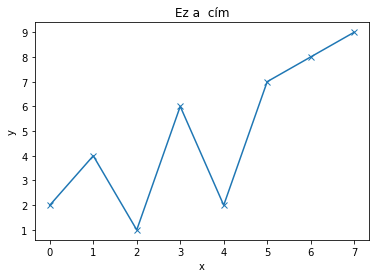

In [83]:
# kreáljunk egy adatsort és plt.plot() függvénnyel rajzoljuk ki
data = np.array([2,4,1,6,2,7,8,9] )

plt.plot(data , "x-")
plt.title("Ez a  cím")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
